In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)  # One-hot encode labels

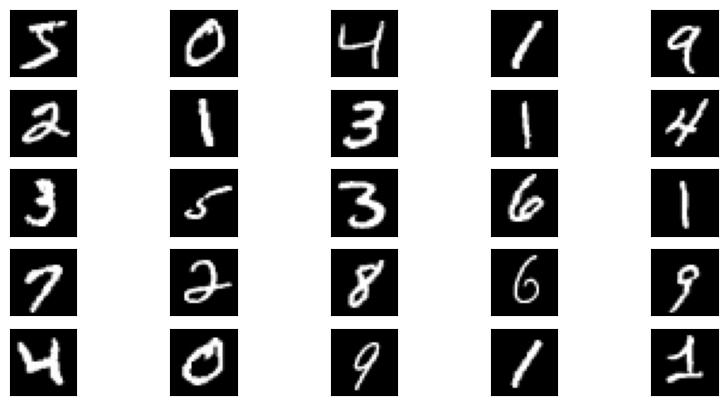

In [31]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')

plt.show()

In [32]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 576)              

In [33]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
  1/750 [..............................] - ETA: 3:59 - loss: 2.3110 - accuracy: 0.1094

2023-12-12 22:42:50.427794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


749/750 [============================>.] - ETA: 0s - loss: 0.3835 - accuracy: 0.8829

2023-12-12 22:43:00.396433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 12s 15ms/step - loss: 0.3832 - accuracy: 0.8830 - val_loss: 0.0756 - val_accuracy: 0.9777
Epoch 2/10
750/750 [==============================] - 12s 15ms/step - loss: 0.1271 - accuracy: 0.9658 - val_loss: 0.0697 - val_accuracy: 0.9818
Epoch 3/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0949 - accuracy: 0.9751 - val_loss: 0.0735 - val_accuracy: 0.9813
Epoch 4/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0745 - accuracy: 0.9796 - val_loss: 0.0536 - val_accuracy: 0.9837
Epoch 5/10
750/750 [==============================] - 11s 14ms/step - loss: 0.0660 - accuracy: 0.9821 - val_loss: 0.0567 - val_accuracy: 0.9869
Epoch 6/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0612 - accuracy: 0.9837 - val_loss: 0.0457 - val_accuracy: 0.9886
Epoch 7/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0483 - accuracy: 0.9866 - val_loss: 0.0533 - val_accuracy: 0.9862
Epo

1/1 [==============================] - 0s 46ms/step


2023-12-12 22:44:47.838313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


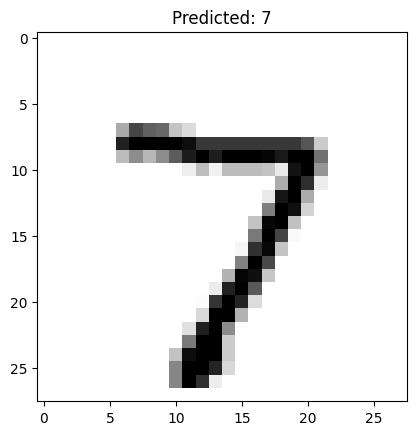

In [34]:
# Function to make and display a prediction
def make_prediction(index):
    prediction = model.predict(np.expand_dims(x_test[index], axis=0))
    predicted_digit = np.argmax(prediction)
    plt.imshow(x_test[index].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Predicted: {predicted_digit}")
    plt.show()

# Example: Display a prediction
make_prediction(0)
